In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

In [3]:
video=cv.VideoCapture("20231016_072727.mp4");i=0;
while(video.isOpened()):
    _,row=video.read();
    i+=1;
    print(row.shape);
    row=cv.cvtColor(row,cv.COLOR_BGR2RGB);
    pts = np.array([[350,750],[770,525],[1110,525],[1750,750]], np.int32)
    pts = pts.reshape((-1,1,2))
    cv.polylines(row,[pts],True,(0,255,255))
    if i==10:
        i=0;    
        cv.imshow("ROI",row);
        if cv.waitKey(1) & 0xFF==ord("q"):
            break
video.release()
cv.destroyAllWindows()

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1

AttributeError: 'NoneType' object has no attribute 'shape'

: 

(1080, 1920, 3)


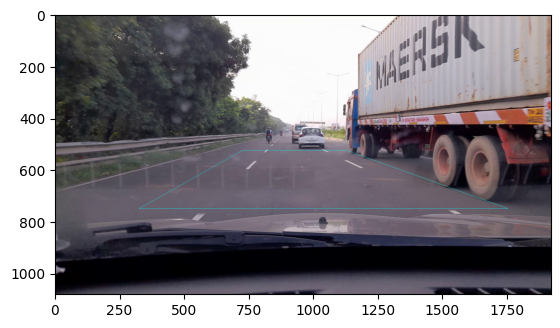

In [7]:
video=cv.VideoCapture("20231016_072727.mp4");
_,row=video.read();
i+=1;
print(row.shape);
row=cv.cvtColor(row,cv.COLOR_BGR2RGB);
pts = np.array([[325,750],[725,525],[1125,525],[1750,750]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(row,[pts],True,(0,255,255))
plt.imshow(row)
plt.show()

In [ ]:
def camera_calibrate():
    nc=(7,7);
    framesize=(1920,1080);
    criteria=(cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER,30,0.001);
    objp=np.zeros((nc[0]*nc[1],3),np.float32)
    objp[:,:2]=np.mgrid[0:nc[0],0:nc[1]].T.reshape(-1,2);
    objPoints=[];
    imgPoints=[];
    paths=["Camera_CAL//11.jpg","Camera_CAL//12.jpg","Camera_CAL//13.jpg","Camera_CAL//14.jpg","Camera_CAL//15.jpg","Camera_CAL//16.jpg"];
    for image in paths:
        row=cv.imread(image);
        print(row);
        gray=cv.cvtColor(row,cv.COLOR_BGR2GRAY);
        ret,corners=cv.findChessboardCorners(gray,nc,None);
        if ret==True:
            objPoints.append(objp);
            imgPoints.append(corners);
        ret,cameraMatrix,dist,rvecs,tvecs=cv.calibrateCamera(objPoints,imgPoints,framesize,None,None);
    return cameraMatrix,dist;

In [ ]:
def binary_thresholded(img):
    # Transform image to gray scale
    gray_img =cv.cvtColor(img, cv.COLOR_BGR2GRAY);
    # Apply sobel (derivative) in x direction, this is usefull to detect lines that tend to be vertical
    sobelx = cv.Sobel(gray_img, cv.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    # Scale result to 0-255
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sx_binary = np.zeros_like(scaled_sobel)
    # Keep only derivative values that are in the margin of interest
    sx_binary[(scaled_sobel >= 30) & (scaled_sobel <= 255)] = 1

    # Detect pixels that are white in the grayscale image
    white_binary = np.zeros_like(gray_img)
    white_binary[(gray_img > 200) & (gray_img <= 255)] = 1

    # Convert image to HLS
    hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
    H = hls[:,:,0]
    S = hls[:,:,2]
    sat_binary = np.zeros_like(S)
    # Detect pixels that have a high saturation value
    sat_binary[(S > 90) & (S <= 255)] = 1

    hue_binary =  np.zeros_like(H)
    # Detect pixels that are yellow using the hue component
    hue_binary[(H > 10) & (H <= 25)] = 1

    # Combine all pixels detected above
    binary_1 = cv.bitwise_or(sx_binary, white_binary)
    binary_2 = cv.bitwise_or(hue_binary, sat_binary)
    binary = cv.bitwise_or(binary_1, binary_2)

    return binary
